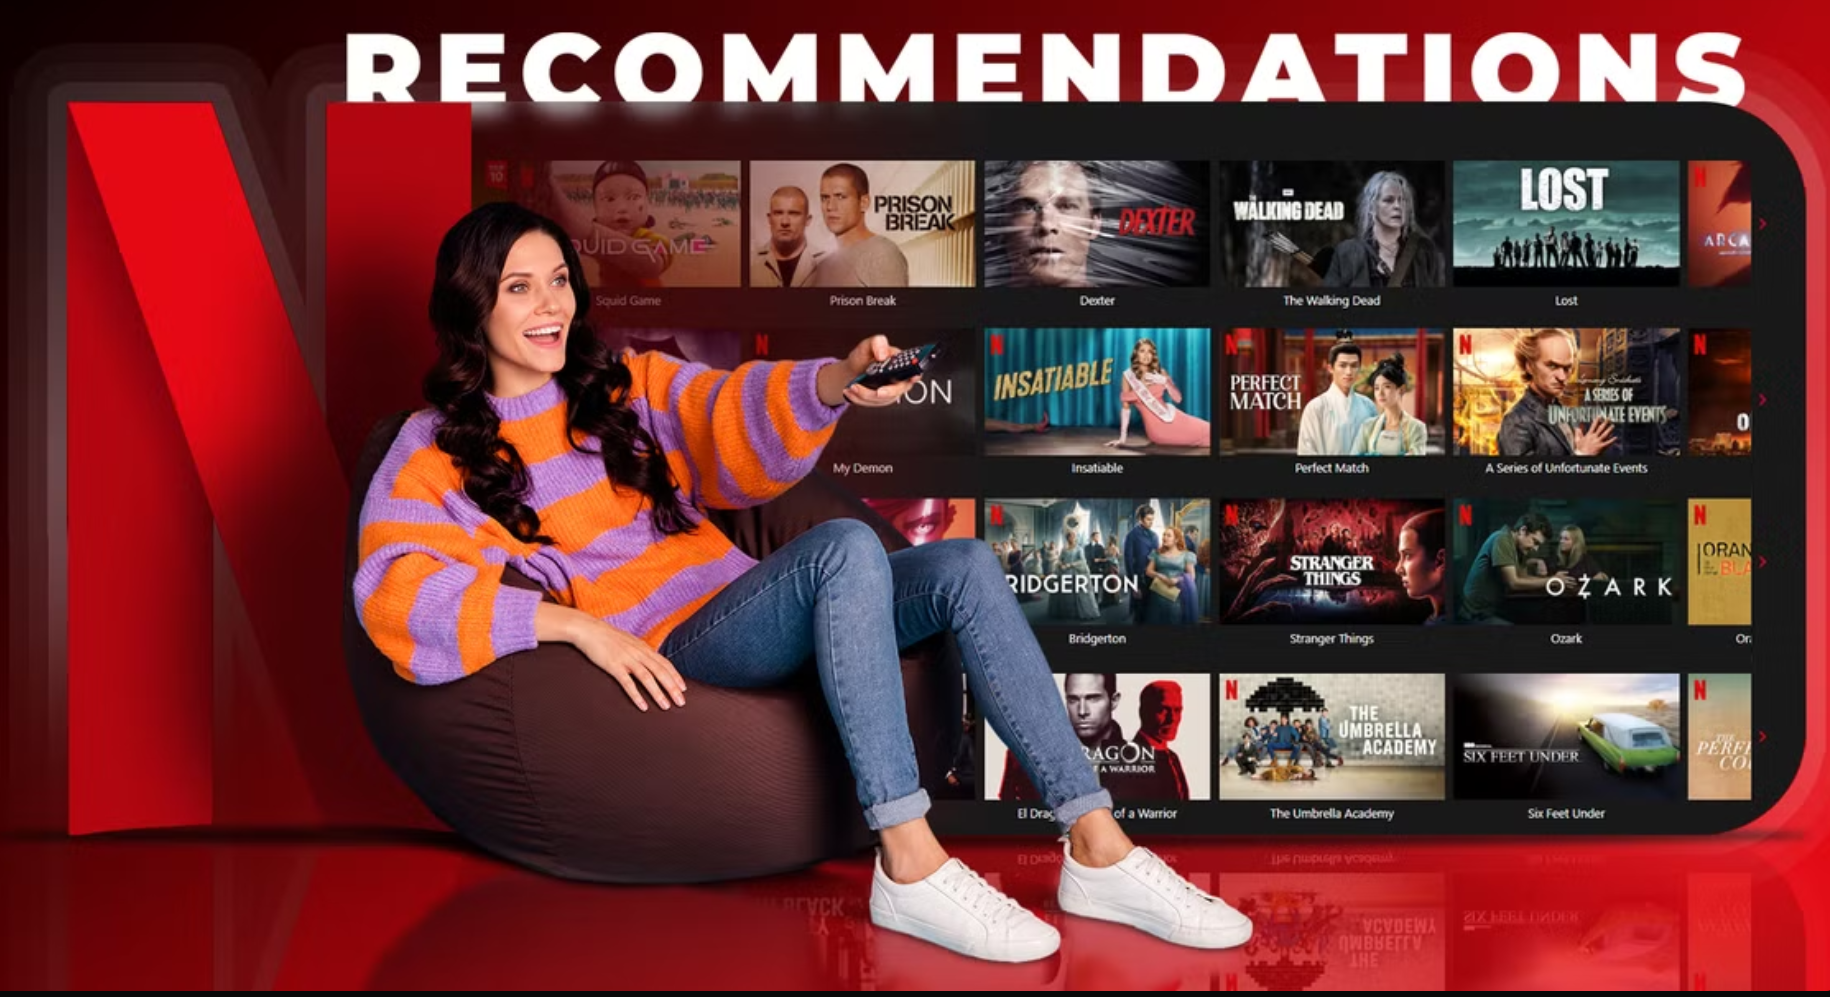

# Recommender Systems Course Project

## Data Loading & Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
!unzip /content/ml-latest-small.zip

Archive:  /content/ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [4]:
movies=pd.read_csv('/content/ml-latest-small/movies.csv')
ratings=pd.read_csv('/content/ml-latest-small/ratings.csv')
links=pd.read_csv('/content/ml-latest-small/links.csv')
tags=pd.read_csv('/content/ml-latest-small/tags.csv')

In [5]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [6]:
ratings.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [7]:
links.head()

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

## Data Understanding & Preprocessing

### Explore Movies Data

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [9]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [10]:
movies.duplicated().sum()

0

##### 📊🔍**Insight**:
- No missing Data
- No duplicated Data

In [11]:
movies['title'].unique()

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       ..., 'Flint (2017)', 'Bungo Stray Dogs: Dead Apple (2018)',
       'Andrew Dice Clay: Dice Rules (1991)'], dtype=object)

In [12]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')

In [13]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  
1                   Adventure|Children|Fantasy  1995  
2                               Comedy|Romance  1995  
3                         Comedy|Drama|Romance  1995  
4                                       Comedy  1995

### geners column

In [14]:
movies['genres'].unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

In [15]:
all_genres = movies['genres'].str.split('|').explode()
genre_counts = all_genres.value_counts()

print("Genres Values:")
print(genre_counts)


Genres Values:
genres
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64


In [16]:
missing_genres = movies[movies['genres'].isna() | (movies['genres'].str.strip() == '') | (movies['genres'] == '(no genres listed)')]

print(f"length movies without Genres: {len(missing_genres)}")
print("-"*50)
missing_genres.head()

length movies without Genres: 34
--------------------------------------------------


movieId                                              title  \
8517   114335                                  La cravate (1957)   
8684   122888                                     Ben-hur (2016)   
8687   122896  Pirates of the Caribbean: Dead Men Tell No Tal...   
8782   129250                                  Superfast! (2015)   
8836   132084                                Let It Be Me (1995)   

                  genres  year  
8517  (no genres listed)  1957  
8684  (no genres listed)  2016  
8687  (no genres listed)  2017  
8782  (no genres listed)  2015  
8836  (no genres listed)  1995

In [17]:
movies_cleaned = movies[~(movies['genres'].isna() | (movies['genres'].str.strip() == '') | (movies['genres'] == '(no genres listed)'))]
movies_cleaned

movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  year  
0     Adventure|Animation|Children|Comedy|Fantasy  1995  
1                      Adventure|Children|Fantasy  1995  
2                                  Comedy|Romance  1995  
3                            Comedy|Drama|Romance  1995  
4                                          Comedy  1995  
...                                           ...   ...  
9737              Action|Animation|Comedy|Fantasy  2017  
9738                     Animation|Comedy|Fantasy  2017  
9739                                        Drama  2017  
9740                             Action|Animation  2018  
9741                                       Comedy  1991  

[9708 rows x 4 columns]

In [18]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [19]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [20]:
ratings.duplicated().sum()

0

##### 📊🔍**Insight**:
- No missing Data
- No duplicated Data

### Explore tags Data

In [21]:
print(tags.info())
print("-"*50)
print(tags.isna().sum())
print("-"*50)
print(tags.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
None
--------------------------------------------------
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64
--------------------------------------------------
0


##### 📊🔍**Insight**:
- No missing Data
- No duplicated Data

### Explore links Data

In [22]:
print(links.info())
print("-"*50)
print(links.isna().sum())
print("-"*50)
print(links.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None
--------------------------------------------------
movieId    0
imdbId     0
tmdbId     8
dtype: int64
--------------------------------------------------
0


##### 📊🔍**Insight**:
- No missing Data
- No duplicated Data

### Data Processing

In [23]:
data = ratings.merge(movies_cleaned, on='movieId')
data.head()

userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  
1                               Comedy|Romance  1995  
2                        Action|Crime|Thriller  1995  
3                             Mystery|Thriller  1995  
4                       Crime|Mystery|Thriller  1995

#### EDA

In [24]:
all_genres = data['genres'].str.split('|').explode()
top_genres = all_genres.value_counts().head(20)

px.bar(top_genres, title="Top 10 Genres (Individual)", labels={"value": "Count", "index": "Genre"})

In [25]:
data['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [26]:
data['rating'].value_counts()

rating
4.0    26810
3.0    20041
5.0    13204
3.5    13130
4.5     8543
2.0     7549
2.5     5544
1.0     2809
1.5     1791
0.5     1368
Name: count, dtype: int64

#### Check Most rating

Text(0.5, 1.0, 'Rating Distribution')

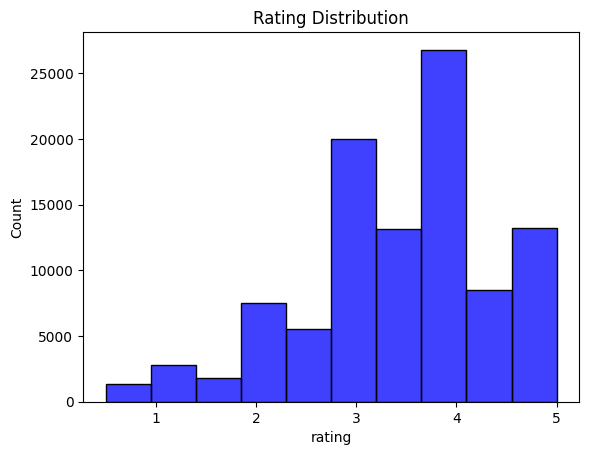

In [27]:
sns.histplot(data['rating'], bins=10,color='blue')
plt.title('Rating Distribution')

##### 📊🔍**Insight**:
- The most ratings is 4

#### Check Most Rated Movie

In [28]:
top_movies = data['title'].value_counts().head(10)
px.bar(top_movies, title="Top 10 Most Rated Movies")

##### 📊🔍**Insight**:
- The most rating movie is Forrest Gump (1994)

In [29]:
data.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres', 'year'], dtype='object')

#### Check most genres

In [30]:
top_genres = data['genres'].value_counts().head(10)
px.bar(top_genres, title="Top 10 genres")

### 📊🔍**Insight**:
- The most genres is Comedy

## Model Training

In [ ]:
# !pip install --no-cache-dir --force-reinstall numpy==1.23.5 scipy==1.9.3


In [ ]:
# !pip install scikit-surprise

In [1]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise import accuracy


In [31]:

reader = Reader(rating_scale=(0.5, 5.0))
data_surprise = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

In [32]:
trainset, testset = train_test_split(data_surprise, test_size=0.2, random_state=42)

model = SVD()
model.fit(trainset)

predictions = model.test(testset)


In [33]:
# Evaluate
acc=accuracy.rmse(predictions)


RMSE: 0.8729


#### Get recomendation

In [34]:
def get_recommendations(user_id, n=5):
    all_movie_ids = data['movieId'].unique()
    user_movies = data[data['userId'] == user_id]['movieId'].unique()

    recommendations = []
    for movie_id in all_movie_ids:
        if movie_id not in user_movies:
            predicted_rating = best_model.predict(user_id, movie_id).est
            recommendations.append((movie_id, predicted_rating))

    recommendations.sort(key=lambda x: x[1], reverse=True)
    return recommendations[:n]


In [35]:
import random
from surprise import SVD
from surprise.model_selection import cross_validate

param_grid = {
    'n_factors': [20, 50, 100, 150],
    'n_epochs': [10, 20, 30, 40],
    'lr_all': [0.002, 0.005, 0.007, 0.01],
    'reg_all': [0.01, 0.02, 0.05, 0.1]
}


n_iterations = 10
best_score = float('inf')
best_params = None

for i in range(n_iterations):
    params = {
        'n_factors': random.choice(param_grid['n_factors']),
        'n_epochs': random.choice(param_grid['n_epochs']),
        'lr_all': random.choice(param_grid['lr_all']),
        'reg_all': random.choice(param_grid['reg_all'])
    }

    model = SVD(**params)
    results = cross_validate(model, data_surprise, measures=['RMSE'], cv=3, verbose=False)
    mean_rmse = results['test_rmse'].mean()

    print(f"Trial {i+1}: RMSE = {mean_rmse:.4f} with params: {params}")

    if mean_rmse < best_score:
        best_score = mean_rmse
        best_params = params

print("\n Best RMSE:", best_score)
print(" Best Parameters:", best_params)


Trial 1: RMSE = 0.8675 with params: {'n_factors': 100, 'n_epochs': 40, 'lr_all': 0.005, 'reg_all': 0.1}
Trial 2: RMSE = 0.8751 with params: {'n_factors': 20, 'n_epochs': 10, 'lr_all': 0.01, 'reg_all': 0.01}
Trial 3: RMSE = 0.8646 with params: {'n_factors': 50, 'n_epochs': 40, 'lr_all': 0.01, 'reg_all': 0.1}
Trial 4: RMSE = 0.8793 with params: {'n_factors': 20, 'n_epochs': 30, 'lr_all': 0.002, 'reg_all': 0.02}
Trial 5: RMSE = 0.8879 with params: {'n_factors': 150, 'n_epochs': 20, 'lr_all': 0.002, 'reg_all': 0.1}
Trial 6: RMSE = 0.8853 with params: {'n_factors': 100, 'n_epochs': 10, 'lr_all': 0.007, 'reg_all': 0.01}
Trial 7: RMSE = 0.9050 with params: {'n_factors': 150, 'n_epochs': 40, 'lr_all': 0.005, 'reg_all': 0.01}
Trial 8: RMSE = 0.8873 with params: {'n_factors': 100, 'n_epochs': 40, 'lr_all': 0.005, 'reg_all': 0.02}
Trial 9: RMSE = 0.8680 with params: {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.05}
Trial 10: RMSE = 0.8871 with params: {'n_factors': 50, 'n_epochs'

In [36]:
best_model = SVD(**best_params)
trainset = data_surprise.build_full_trainset()
best_model.fit(trainset)

In [37]:
def get_top_n_movie_titles(user_id, movies_df, n=10):
    top_n = get_recommendations(user_id, n)
    results = []
    for movie_id, score in top_n:
        title = movies_df[movies_df['movieId'] == movie_id]['title'].values[0]
        results.append((title, round(score, 2)))
    return pd.DataFrame(results, columns=['Movie Title', 'Predicted Rating'])


get_top_n_movie_titles(user_id=1, movies_df=movies, n=10)


Movie Title  Predicted Rating
0                   Shawshank Redemption, The (1994)               5.0
1                   In the Name of the Father (1993)               5.0
2                                  Casablanca (1942)               5.0
3                                   Afterglow (1997)               5.0
4                     Outlaw Josey Wales, The (1976)               5.0
5  Dr. Strangelove or: How I Learned to Stop Worr...               5.0
6                                General, The (1926)               5.0
7                                Mary and Max (2009)               5.0
8   Three Billboards Outside Ebbing, Missouri (2017)               5.0
9                                         Ran (1985)               5.0

In [38]:
import pickle

# Save
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

### Deployment

In [39]:
import gradio as gr

def recommend_for_user(user_id, top_n):
    df = get_top_n_movie_titles(user_id=int(user_id), movies_df=movies, n=top_n)
    return df

gr.Interface(
    fn=recommend_for_user,
    inputs=[
        gr.Number(label="User ID", value=1),
        gr.Slider(1, 20, value=10, step=1,label="Top-N Recommendations")
    ],
    outputs=gr.Dataframe(label="Recommended Movies"),
    title="User-Based Movie Recommender"
).launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a382026c90d93cac51.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
